# Задание
Моделирование скорости полета ракеты в зависимости от количества используемых ступеней

In [146]:
import numpy as np
from scipy.constants import g
import matplotlib.pyplot as plt

In [147]:
%matplotlib notebook

## одноступенчатая ракета

In [148]:
u0 = 0 # начальная скорость
u = 3 # скорость течения топлива
m0 = 10 # полная масса ракеты
mp = 1 # полезная нагрузка
alpha = 0.1 # отношение полной массы к структурной + полезной
t_max = 100 # время сгорания топлива
def m(t):
    return m0 - ((1-alpha)*(m0-mp))*t/t_max # закон изменения массы

### Скорость в зависимости от времени

<IPython.core.display.Javascript object>


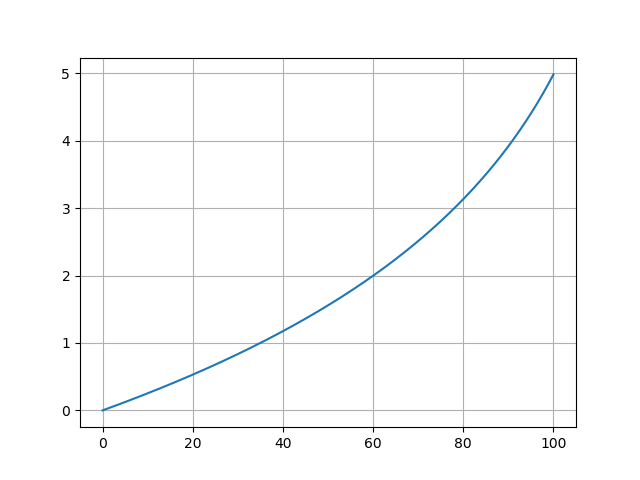

In [149]:
x = np.linspace(0,100,1000)
plt.figure()
plt.grid()
plt.plot(x, u0 + u*np.log(m0/m(x)))

### Максимальная скорость в зависимости от параматра $\alpha=\frac{ms}{m0-mp}$

<IPython.core.display.Javascript object>


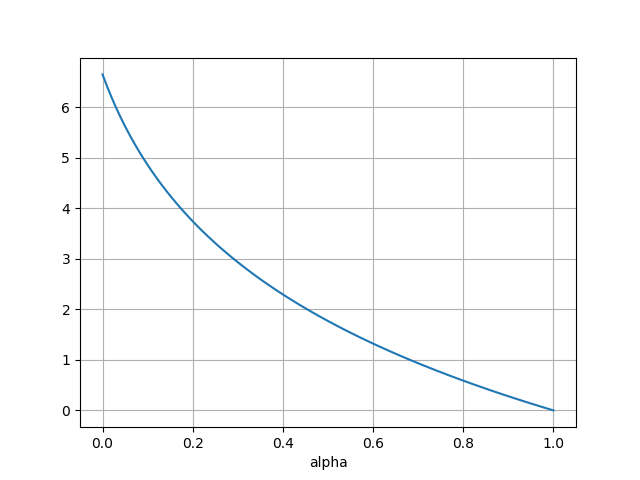

In [150]:
plt.figure()
plt.grid()
plt.xlabel('alpha')
u_max = []
for t in np.linspace(0,1,100):
    alpha = t
    u_max.append(u0 + u*np.log(m0/m(t_max-1)))
plt.plot(np.linspace(0,1,100), u_max)
alpha = 0.1

### Максимальная скорость в зависимости от полезной нагрузки

<IPython.core.display.Javascript object>


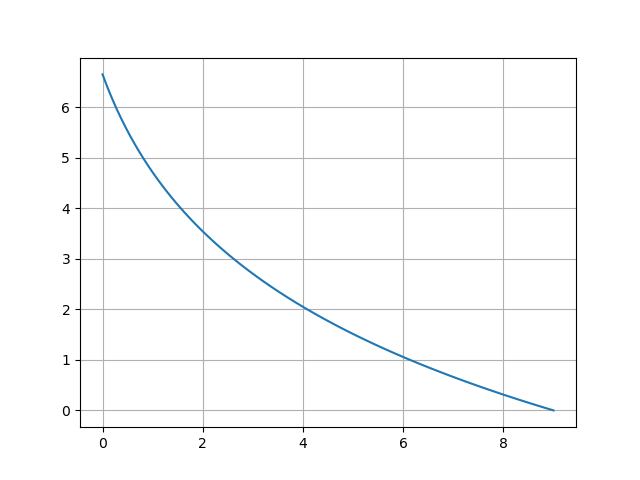

In [151]:
plt.figure()
plt.grid()
u_max = []
for t in np.linspace(0, m0, 100):
    mp = t
    u_max.append(u0 + u*np.log(m0/m(t_max-1)))
plt.plot(np.linspace(0, m0-1, 100), u_max)
mp = 1

## Многоступенчатая ракета

In [152]:
def u(t, u0, u_
      ,m_
      ,mp
      ,alpha
      ,t_max = [100, 100, 100] # время сгорания топлива
     ):
    m0 = sum(m_)+mp
    t_ = 0
    i = 0
    res = 0
    while i< len(t_max) and t >= t_+t_max[i]:
        res = m0 - ((1-alpha[i])*m_[i])
        u0 = u0 + u_[i]*np.log(m0/res)
        m0 = m0 - m_[i]
        t_ = t_ + t_max[i]
        i = i + 1
    i = min(i, len(t_max)-1)
    res = (m0 - ((1-alpha[i])*m_[i])*(t-t_)/t_max[i])
    return u0 + u_[i]*np.log(m0/res)

### Скорость в зависимости от времени

[4.904657645537247, 2.7603994142873263, 1.5535854848770292]


<IPython.core.display.Javascript object>


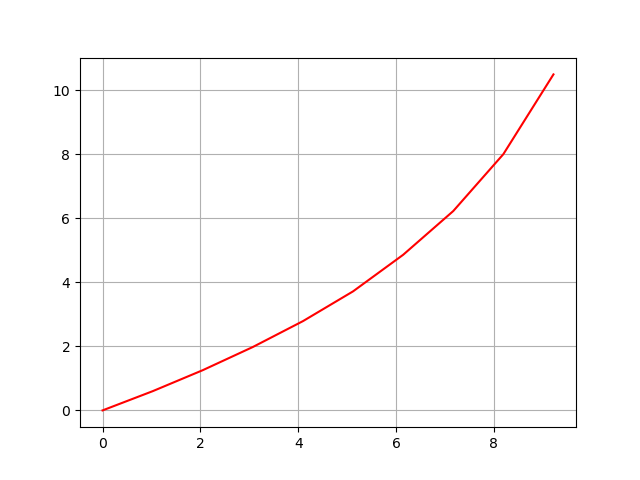

In [172]:
n = 3 
alpha = 0.1
u_max = 10.5
u_ = 7
a = (1-alpha)/(np.exp(-u_max/(n*u_))-alpha)
mp = 2
m_ = [mp]
for i in range(0,n):
    m_.append(sum(m_)*(a-1))
m_ = m_[1::]
m_ = m_[::-1]
print(m_)
t_max = m_*100 # время сгорания топлива
m0 = sum(m_)+mp
plt.figure()
plt.grid()
x = np.linspace(0, sum(m_), 10)
plt.plot(x, [u(t,0, u_=[u_]*n, m_=m_, mp=mp, alpha = [alpha]*n, t_max=m_) for t in x],'r')
#u0 = 0 # начальная скорость
#u_ = [7] # скорость течения топлива


#u1 = u_[0]*np.log(m0/(mp+alpha[0]*m_[0]+m_[1]+m_[2]))
#m0 = sum(m_)+mp
#u2 = u1 + u_[0]*np.log((mp+m_[1]+m_[2])/(mp+alpha[1]*m_[1]+m_[2]))
#m0 = sum(m_)+mp
#u3 = u2 + u_[0]*np.log((mp+m_[2])/(mp+alpha[2]*m_[2]))
#plt.plot([100,200,300], [u1,u2,u3]);

array([1150.27044144, 1149.0043603 , 1147.73827916, 1146.47219803,
       1145.20611689, 1143.94003575, 1142.67395461, 1141.40787347,
       1140.14179233, 1138.87571119])

### Отношение полной массы к полезной при заданных скорости течения топлива и коэффиециенте структурной массы

<IPython.core.display.Javascript object>


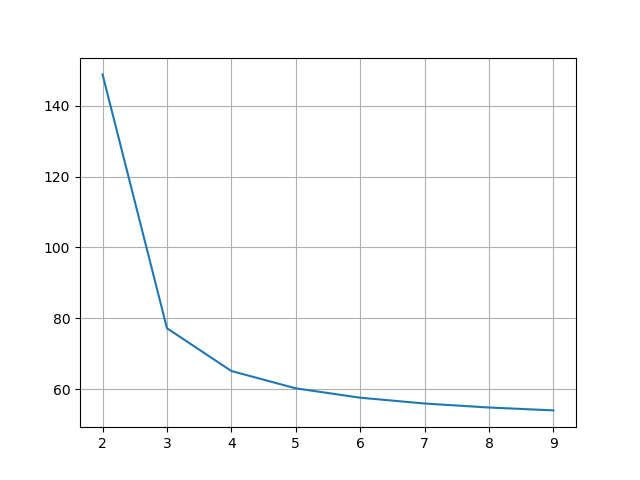

In [10]:
alpha = 0.1
un = 10.5
u = 3
s = [t for t in range(2, 10)]
plt.figure()
plt.grid()
plt.plot(s, [((1-alpha)/(np.exp(-un/(n*u))-alpha))**n for n in s]);